In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
base_path = '../input/siim-isic-melanoma-classification'
train_ext = '/jpeg/train/'
test_ext = '/jpeg/test/'
train_csv = pd.read_csv("../input/siim-isic-melanoma-classification/train.csv")
test_csv = pd.read_csv("../input/siim-isic-melanoma-classification/test.csv")
hair_img =['ISIC_0078712','ISIC_0080817','ISIC_0082348','ISIC_0109869','ISIC_0155012','ISIC_0159568','ISIC_0164145','ISIC_0194550','ISIC_0194914','ISIC_0202023']
without_hair_img = ['ISIC_0015719','ISIC_0074268','ISIC_0075914','ISIC_0084395','ISIC_0085718','ISIC_0081956']

In [4]:
train_csv.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0

In [5]:
test_csv.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity

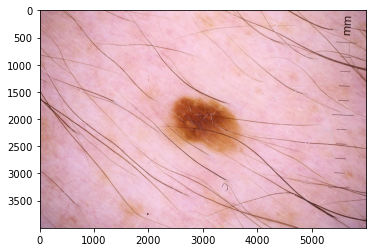

In [6]:
# for i in hair_images:
img = cv2.imread(base_path + '/jpeg/train/' + "ISIC_0082348" + '.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     break

In [7]:
def plot_rnd_img(df,ext,itr=9,typ="train"):
    img_name = df["image_name"].values
    rnd_img = [np.random.choice(img_name+".jpg") for i in range(itr)]
    img_path = [os.path.join(base_path+ext,i) for i in rnd_img]

    plt.figure(figsize=(10,12))
    for i in range(itr):
        plt.subplot(3, 3, i + 1)
        img = plt.imread(img_path[i])
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    print("random image from "+typ+" dir")

random image from train dir


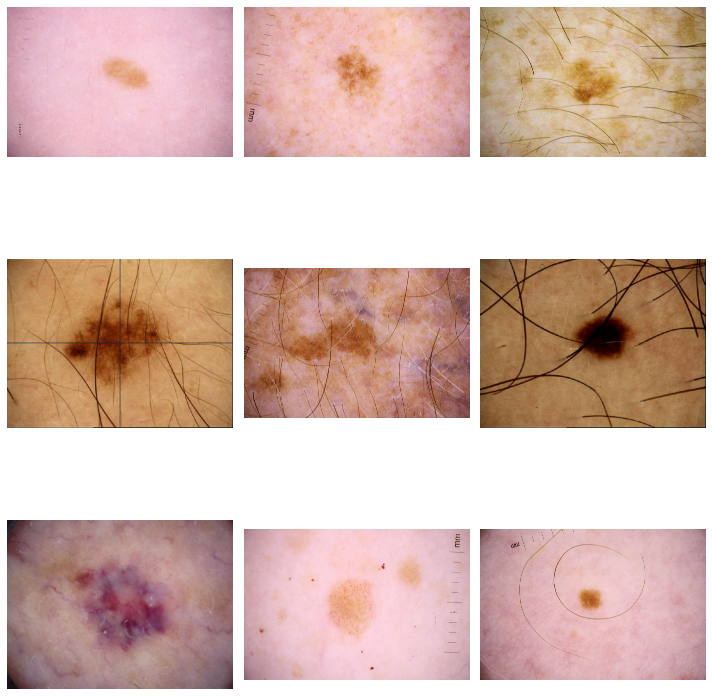

In [8]:
# plotting imgs from training
plot_rnd_img(train_csv,train_ext)

random image from test dir


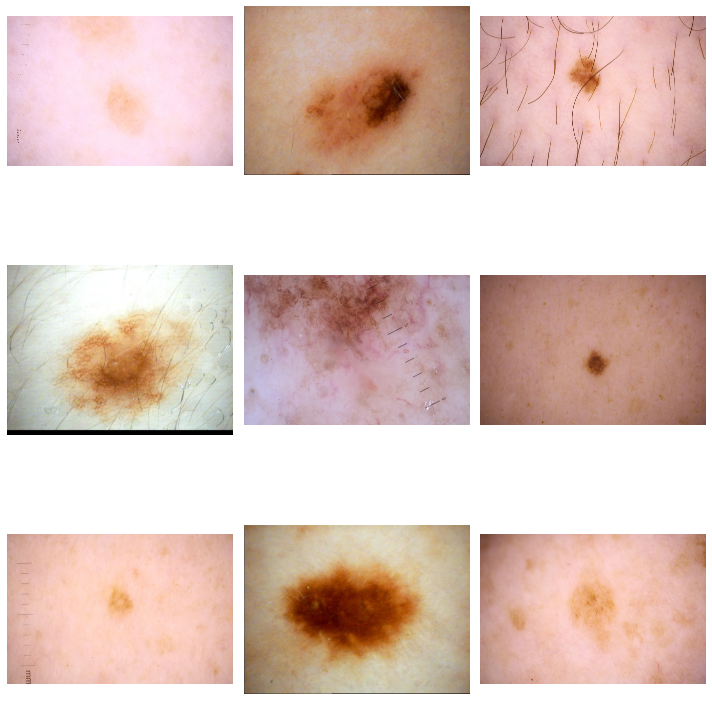

In [9]:
# plotting imgs from testing
plot_rnd_img(test_csv,test_ext,typ="test")

In [10]:
def get_cancer_img(itr,typ):
    img_list = []
    count=0
    while count!=itr:
        num = np.random.choice(range(33126))
        if train_csv["benign_malignant"][num]==typ:
            img_list.append(train_csv["image_name"][num])
            count+=1
    return img_list
        
    

In [11]:
# plotting random malignant images
# # plot_cancer_type("malignant")
def plot_cancer_img(itr,typ):
    itr=itr
    typ=typ
    type_img = get_cancer_img(itr,typ)
    img_path = [os.path.join(base_path+train_ext,i+".jpg") for i in type_img]
    plt.figure(figsize=(10,12))
    for i in range(itr):
        plt.subplot(3, 3, i + 1)
        img = plt.imread(img_path[i])
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    print(typ+" image from train dir")

malignant image from train dir


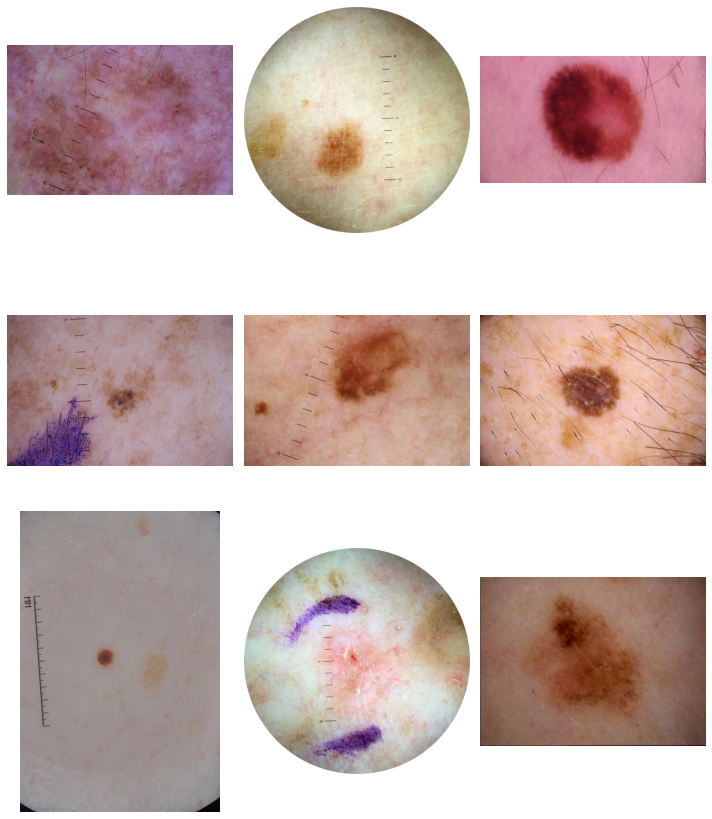

In [12]:
plot_cancer_img(9,"malignant")

benign image from train dir


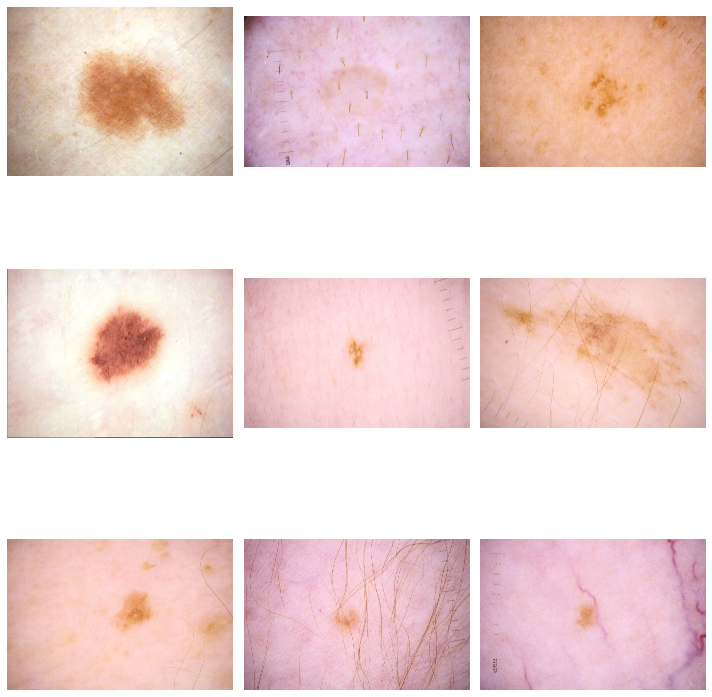

In [13]:
plot_cancer_img(9,"benign")

In [14]:
def remove_hair(image_path):
    # read image
    image = cv2.imread(image_path)
    
    # fixing RGB channels
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    ret,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    
    return final_image,threshold,blackhat,image

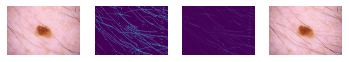

In [17]:
img_path = os.path.join(base_path+train_ext,hair_img[2]+".jpg")
inpainted_img,thrs,blackhat,img = remove_hair(img_path)
all_imgs = [inpainted_img,thrs,blackhat,img]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(all_imgs[i])
    plt.axis('off')


In [19]:
BASE_PATH = '../input/siim-isic-melanoma-classification'
hair_images =['ISIC_0078712','ISIC_0080817','ISIC_0082348','ISIC_0109869','ISIC_0155012','ISIC_0159568','ISIC_0164145','ISIC_0194550','ISIC_0194914','ISIC_0202023']
without_hair_images = ['ISIC_0015719','ISIC_0074268','ISIC_0075914','ISIC_0084395','ISIC_0085718','ISIC_0081956']

[]

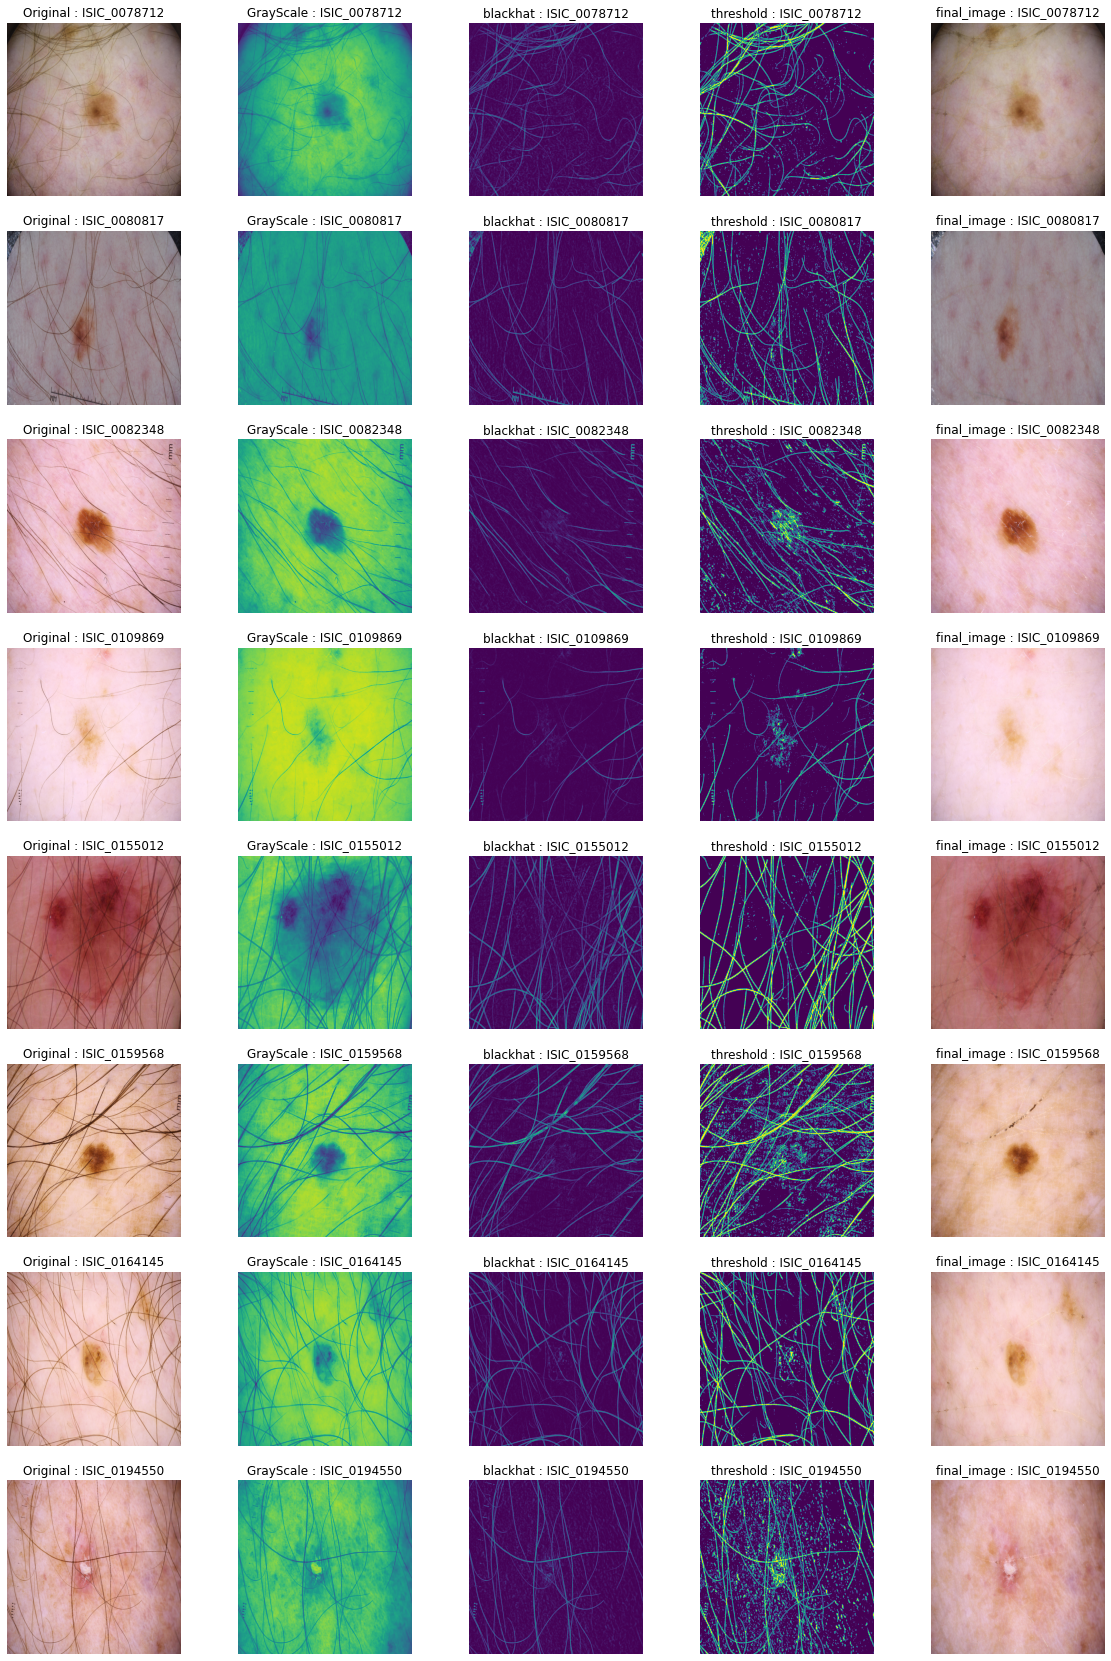

In [20]:
l = len(hair_images[:8])

fig = plt.figure(figsize=(20,30))

for i,image_name in enumerate(hair_images[:8]):
    
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(l, 5, (i*5)+1)
    # Convert the original image to grayscale
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    plt.subplot(l, 5, (i*5)+2)
    plt.imshow(grayScale)
    plt.axis('off')
    plt.title('GrayScale : '+ image_name)
    
    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # Perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    plt.subplot(l, 5, (i*5)+3)
    plt.imshow(blackhat)
    plt.axis('off')
    plt.title('blackhat : '+ image_name)
    
    # intensify the hair countours in preparation for the inpainting 
    ret,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    plt.subplot(l, 5, (i*5)+4)
    plt.imshow(threshold)
    plt.axis('off')
    plt.title('threshold : '+ image_name)
    
    # inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    plt.subplot(l, 5, (i*5)+5)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('final_image : '+ image_name)
       
plt.plot()

In [ ]:
# morphologyEx is used to detect the foreground 